# Spectroscopic EFFTIME distribution for exposures that have the same GFA EFFTIME range of [160s, 200s]

In [11]:
import os
import numpy as np
import astropy.table as atable

import sv as SV

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.v4.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.v4.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v4.fits'))

In [13]:
all_exps = SV.info_exposures(release='everest')

in_bright = (all_exps['FAPRGRM'] == 'bgsmws') | (all_exps['FAPRGRM'] == 'bright')
print("%i exposures in BRIGHT" % np.sum(in_bright))

sv1_exps = all_exps[(all_exps['SURVEY'] == 'sv1') & in_bright]
sv3_exps = all_exps[(all_exps['SURVEY'] == 'sv3') & in_bright]
main_exps = all_exps[(all_exps['SURVEY'] == 'main') & in_bright]

print('%i SV1 BRIGHT exposure' % len(sv1_exps))
print('%i SV3 BRIGHT exposure' % len(sv3_exps))
print('%i MAIN BRIGHT exposure' % len(main_exps))

1418 exposures in BRIGHT
635 SV1 BRIGHT exposure
298 SV3 BRIGHT exposure
409 MAIN BRIGHT exposure


Text(0, 0.5, '$N_{\\rm exp}$')

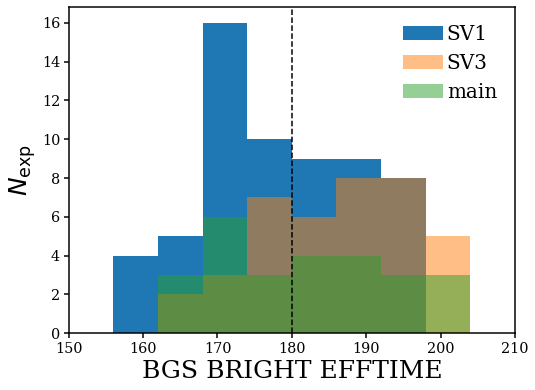

In [18]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_   = sub.hist(sv1_exps['BGS_EFFTIME_BRIGHT'][(sv1_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv1_exps['BGS_EFFTIME_BRIGHT'] < 200)], range=(150., 210), bins=10, label='SV1')
_   = sub.hist(sv3_exps['BGS_EFFTIME_BRIGHT'][(sv3_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv3_exps['BGS_EFFTIME_BRIGHT'] < 200)], range=(150., 210), bins=10, alpha=0.5, label='SV3')
_   = sub.hist(main_exps['BGS_EFFTIME_BRIGHT'][(main_exps['BGS_EFFTIME_BRIGHT'] > 160) & (main_exps['BGS_EFFTIME_BRIGHT'] < 200)], range=(150., 210), bins=10, alpha=0.5, label='main')

sub.axvline(180, color='k', linestyle='--')
#sub.text(185, 120, r'$t_{\rm nom}= 180s$', fontsize=20)

sub.legend(loc='upper right', fontsize=20, handletextpad=0.2)
sub.set_xlabel(r'BGS BRIGHT EFFTIME', fontsize=25)
sub.set_xlim(150., 210)
sub.set_ylabel(r'$N_{\rm exp}$', fontsize=25)

Text(0.5, 0, 'EXP. EFFTIME SPEC')

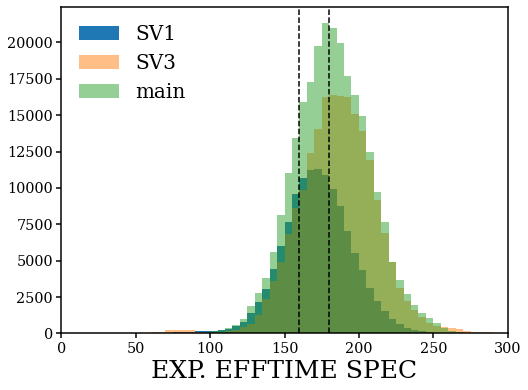

In [6]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

_ = sub.hist(sv1_gals['EFFTIME_TSNR2_BGS'], bins=np.arange(0.0, 4.e2, 5.), label='SV1')
_ = sub.hist(sv3_gals['EFFTIME_TSNR2_BGS'], bins=np.arange(0.0, 4.e2, 5.), alpha=0.5, label='SV3')
_ = sub.hist(main_gals['EFFTIME_TSNR2_BGS'], bins=np.arange(0.0, 4.e2, 5.), alpha=0.5, label='main')

sub.axvline(180., c='k', linestyle='--')
sub.axvline(160., c='k', linestyle='--')

sub.legend(loc='upper left', fontsize=20)
sub.set_xlim(0.0, 300.)
sub.set_xlabel('EXP. EFFTIME SPEC', fontsize=25)